In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('csvs/librationcenters.csv', index_col=0)
df.head()

,K,mag,filename,phi_bcd,phi_cde,phi_def,phi_efg,phi_fgh
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,180.942875,178.786975,159.473438,72.594696,184.056444
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,190.900879,300.483438,153.734757,76.238337,183.543375
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,205.119741,304.742293,140.799400,79.610096,179.641168
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,348.877103,5.394857,297.858031,224.000963,143.139271
7,14.211,0.218650,IC7K1.4211e+01mag2.1865e-01.bin,243.790429,71.575234,120.974760,77.358878,181.352829


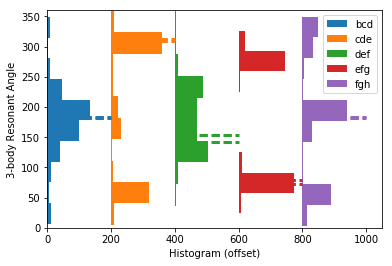

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])

fig, ax = plt.subplots()

luger_ranges = {('b','c','d'):[182, 184], ('c','d','e'):[310, 313], ('d','e','f'):[142,154], ('e','f','g'):[72,79], ('f','g','h'):[182.5,183.5]}
for i, resonance in enumerate(threebodyresonances.items()):
    triad = resonance[0]
    p1 = triad[0]
    p2 = triad[1]
    p3 = triad[2]
    name = p1+p2+p3
    
    hist, bins = np.histogram(df['phi_'+name], bins=10)
    width = bins[1] - bins[0]
    center = (bins[:-1] + bins[1:]) / 2
    bar = ax.barh(center, hist, align='center', height=width, left=200*i, label=name)
    minluger = luger_ranges[triad][0]
    maxluger = luger_ranges[triad][1]

    ax.plot([200*i, 200*(i+1)], [minluger, minluger], color=bar[-1].get_facecolor(), linestyle='--', lw=3)
    ax.plot([200*i, 200*(i+1)], [maxluger, maxluger], color=bar[-1].get_facecolor(), linestyle='--', lw=3)


ax.set_ylim([0,360])
#ax.set_xlim([0,350])

ax.set_ylabel('3-body Resonant Angle')
ax.set_xlabel('Histogram (offset)')
ax.legend()

In [4]:
fig.savefig("fig2.pdf", bbox_inches='tight')